In [4]:
%matplotlib inline


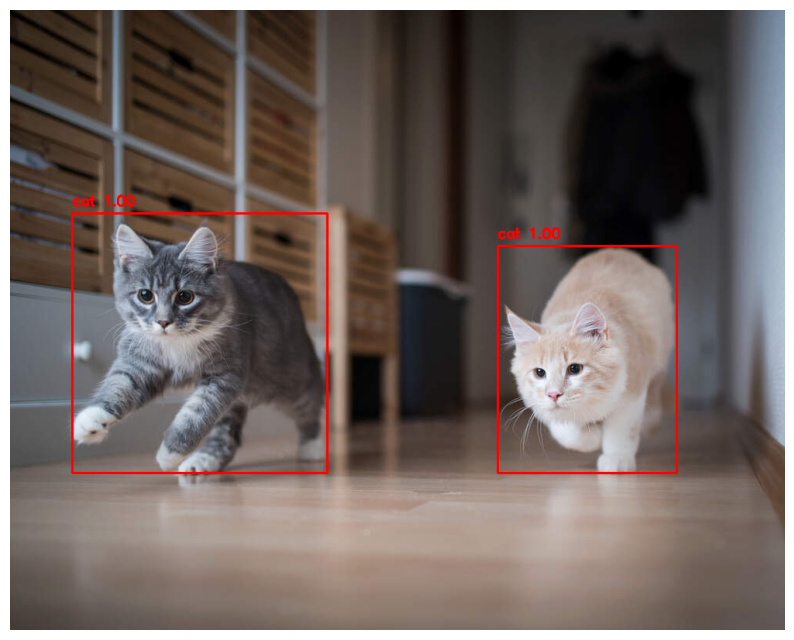

In [2]:
import json
import matplotlib.pyplot as plt
import cv2

# JSON ที่ได้ (สมมติเก็บในตัวแปร json_data)
json_data = {
  "predictions": [
    {
      "x": 745.117,
      "y": 451.172,
      "width": 230.957,
      "height": 293.457,
      "confidence": 0.998,
      "class": "cat",
      "class_id": 0,
      "detection_id": "009ed3d4-f358-49e4-9fa8-fa20bd0dfae0"
    },
    {
      "x": 245,
      "y": 430,
      "width": 328.613,
      "height": 335.449,
      "confidence": 0.996,
      "class": "cat",
      "class_id": 0,
      "detection_id": "155661cf-cd10-49f6-b3f2-61fb81d0cab6"
    }
  ]
}

def xywh_to_xyxy(x, y, w, h):
    x_min = int(x - w/2)
    y_min = int(y - h/2)
    x_max = int(x + w/2)
    y_max = int(y + h/2)
    return [x_min, y_min, x_max, y_max]

def draw_bbox(img, bbox, label=None, color=(255,0,0), thickness=2):
    x_min, y_min, x_max, y_max = bbox
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color, thickness)
    if label:
        cv2.putText(img, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 
                    0.6, color, 2)
    return img

# โหลดภาพแมว (ใส่ path ของภาพจริง)
image_path = "cat.jpg"
img = cv2.imread("C:/university/241-353/T.Fern/program/yolov5/data/images/sample_cat_image.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# วาด bbox จาก prediction
for pred in json_data["predictions"]:
    bbox = xywh_to_xyxy(pred["x"], pred["y"], pred["width"], pred["height"])
    conf = pred["confidence"]
    label = f"{pred['class']} {conf:.2f}"
    img = draw_bbox(img, bbox, label=label)

# แสดงภาพ
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis("off")
plt.show()


In [ ]:
def yolo_to_corners(x_center, y_center, width, height):
    x1 = x_center - width / 2
    y1 = y_center - height / 2
    x2 = x_center + width / 2
    y2 = y_center + height / 2
    return x1, y1, x2, y2

def compute_iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    inter_area = max(0, x2 - x1) * max(0, y2 - y1)
    area1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area2 = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union_area = area1 + area2 - inter_area

    if union_area == 0:
        return 0.0
    return inter_area / union_area

# Ground truth boxes (label ด้วยมือ)
gt_box_white=[0.7470, 0.5652, 0.2223, 0.3697]
gt_box_gray=[0.2439, 0.5481, 0.3289, 0.4058]


# Prediction results
pred_sets = [
    {
        "conf": [0.52, 0.81],
        "boxes": [
            [0.7455, 0.561875, 0.229, 0.35375],
            [0.243, 0.5475, 0.336, 0.41]
        ]
    },
    {
        "conf": [0.82, 0.90],
        "boxes": [
            [0.747, 0.564375, 0.232, 0.36875],
            [0.243, 0.5475, 0.336, 0.41]
        ]
    },
    {
        "conf": [0.73, 0.90],
        "boxes": [
            [0.7455, 0.56625, 0.227, 0.365],
            [0.2435, 0.545625, 0.327, 0.41875]
        ]
    }
]

# คำนวณ IoU ทุกชุด
for i, pred in enumerate(pred_sets, start=1):
    pred_white = yolo_to_corners(*pred["boxes"][0])
    pred_gray = yolo_to_corners(*pred["boxes"][1])
    gt_white = yolo_to_corners(*gt_box_white)
    gt_gray = yolo_to_corners(*gt_box_gray)

    iou_white = compute_iou(pred_white, gt_white)
    iou_gray = compute_iou(pred_gray, gt_gray)

    print(f"  Right  Conf: {pred['conf'][0]}, IoU: {iou_white:.4f}")
    print(f"  Left   Conf: {pred['conf'][1]}, IoU: {iou_gray:.4f}")
    print()

 Set 1
  Cat 1 (White) - Conf: 0.52, IoU: 0.9300
  Cat 2 (Gray)  - Conf: 0.81, IoU: 0.9688

 Set 2
  Cat 1 (White) - Conf: 0.82, IoU: 0.9541
  Cat 2 (Gray)  - Conf: 0.9, IoU: 0.9688

 Set 3
  Cat 1 (White) - Conf: 0.73, IoU: 0.9671
  Cat 2 (Gray)  - Conf: 0.9, IoU: 0.9636



In [4]:
def to_xyxy(x, y, w, h):
    return x - w / 2, y - h / 2, x + w / 2, y + h / 2

def iou(b1, b2):
    xa, ya, xb, yb = max(b1[0], b2[0]), max(b1[1], b2[1]), min(b1[2], b2[2]), min(b1[3], b2[3])
    inter = max(0, xb - xa) * max(0, yb - ya)
    area1 = (b1[2] - b1[0]) * (b1[3] - b1[1])
    area2 = (b2[2] - b2[0]) * (b2[3] - b2[1])
    return inter / (area1 + area2 - inter) if area1 + area2 - inter else 0.0

gt_r = to_xyxy(0.7470, 0.5652, 0.2223, 0.3697)
gt_l = to_xyxy(0.2439, 0.5481, 0.3289, 0.4058)

preds = [
    {"conf": [0.52, 0.81], "box": [[0.7455, 0.561875, 0.229, 0.35375], [0.243, 0.5475, 0.336, 0.41]]},
    {"conf": [0.82, 0.90], "box": [[0.747, 0.564375, 0.232, 0.36875], [0.243, 0.5475, 0.336, 0.41]]},
    {"conf": [0.73, 0.90], "box": [[0.7455, 0.56625, 0.227, 0.365], [0.2435, 0.545625, 0.327, 0.41875]]}
]

for p in preds:
    b_r = to_xyxy(*p["box"][0])
    b_l = to_xyxy(*p["box"][1])
    print(f"  Right  Conf: {p['conf'][0]}, IoU: {iou(b_r, gt_r):.4f}")
    print(f"  Left   Conf: {p['conf'][1]}, IoU: {iou(b_l, gt_l):.4f}\n")


  Right  Conf: 0.52, IoU: 0.9300
  Left   Conf: 0.81, IoU: 0.9688

  Right  Conf: 0.82, IoU: 0.9541
  Left   Conf: 0.9, IoU: 0.9688

  Right  Conf: 0.73, IoU: 0.9671
  Left   Conf: 0.9, IoU: 0.9636



In [5]:
import sys
if 'C:\\opencv\\build\\python' in sys.path:
    sys.path.remove('C:\\opencv\\build\\python')

import cv2
print(cv2.__version__)


4.11.0


In [37]:
import cv2

image_path = "C:/university/241-353/T.Fern/program/yolov5/runs/detect/exp6/sample_cat_image.jpg"
img = cv2.imread(image_path)

# ขนาดภาพ
height, width = img.shape[:2]

print(f"Width: {width}, Height: {height}")


Width: 1000, Height: 800


In [1]:
json_data = {
  "predictions": [
    {
      "x": 745.117,
      "y": 451.172,
      "width": 230.957,
      "height": 293.457,
      "confidence": 0.998,
      "class": "cat",
      "class_id": 0,
      "detection_id": "009ed3d4-f358-49e4-9fa8-fa20bd0dfae0"
    },
    {
      "x": 245,
      "y": 430,
      "width": 328.613,
      "height": 335.449,
      "confidence": 0.996,
      "class": "cat",
      "class_id": 0,
      "detection_id": "155661cf-cd10-49f6-b3f2-61fb81d0cab6"
    }
  ]
}

def normalize_and_print(data, divisor=640):
    for i, pred in enumerate(data["predictions"], 1):
        x = pred["x"] / divisor
        y = pred["y"] / divisor
        w = pred["width"] / divisor
        h = pred["height"] / divisor
        print(f"Box {i}: [{x:.6f}, {y:.6f}, {w:.6f}, {h:.6f}]")

normalize_and_print(json_data)


Box 1: [1.164245, 0.704956, 0.360870, 0.458527]
Box 2: [0.382812, 0.671875, 0.513458, 0.524139]
